
## 📘 Question: Signal Smoothing Using a First-Order Difference Equation

Consider the first-order difference equation:

$$
y(n) = (1 - \alpha) \cdot y(n - 1) + \alpha \cdot x(n)
$$

where $0 < \alpha < 1$, and $y(-1) = 0$.

---

### **1. Given Input Signal:**

$$
x(n) = [1,\ 2,\ 2,\ 10,\ 2,\ 2,\ 1]
$$

* Compute and plot the output $y(n)$ for:

  * $\alpha = 0.2$
  * $\alpha = 0.8$
* Comment on the effect of $\alpha$ on smoothing and responsiveness.

---


### **2. Sinusoidal Signal with Random Noise:**

* Generate a discrete-time sinusoidal signal:

  $$
  x(n) = \sin\left( \frac{2\pi f n}{N} \right), \quad n = 0, 1, 2, \ldots, N-1
  $$

  Choose $f = 1$ Hz, $N = 100$, and add **random noise**:

  $$
  x_{noisy}(n) = x(n) + \text{randn}(n)
  $$
* Apply the same difference equation with:

  * $\alpha = 0.2$
  * $\alpha = 0.8$
* Plot and compare:

  * Original clean sine wave
  * Noisy input
  * Smoothed outputs for both $\alpha$ values

---

### **Goal:**

Understand how the value of $\alpha$ affects the output when dealing with **noisy signals**, particularly in filtering and signal reconstruction contexts.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper Function: Filter Implementation
def difference_eq(x, alpha):
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        if n == 0:
            y[n] = alpha * x[n]  # y[-1] = 0
        else:
            y[n] = (1 - alpha) * y[n - 1] + alpha * x[n]
    return y



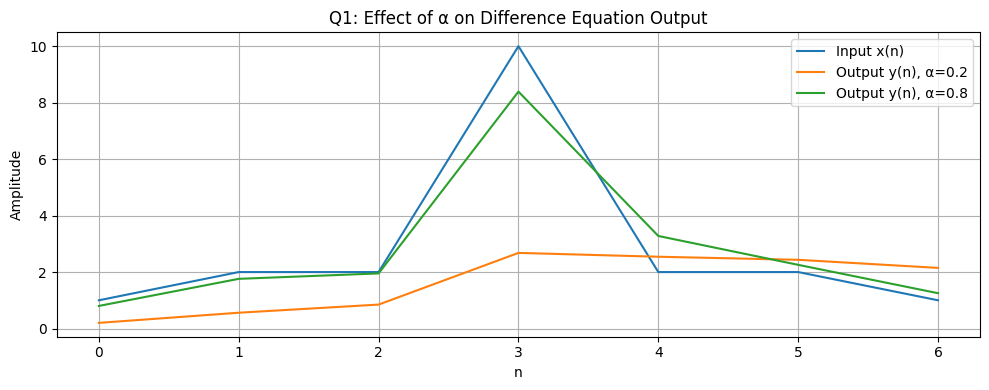

In [30]:

# Q1: Given x(n)

x_given = np.array([1, 2, 2, 10, 2, 2, 1])

alpha1 = 0.2
alpha2 = 0.8

y_alpha1 = difference_eq(x_given, alpha1)
y_alpha2 = difference_eq(x_given, alpha2)

plt.figure(figsize=(10, 4))
plt.plot(x_given, label='Input x(n)')
plt.plot(y_alpha1,  label='Output y(n), α=0.2')
plt.plot(y_alpha2,  label='Output y(n), α=0.8')
plt.title('Q1: Effect of α on Difference Equation Output')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


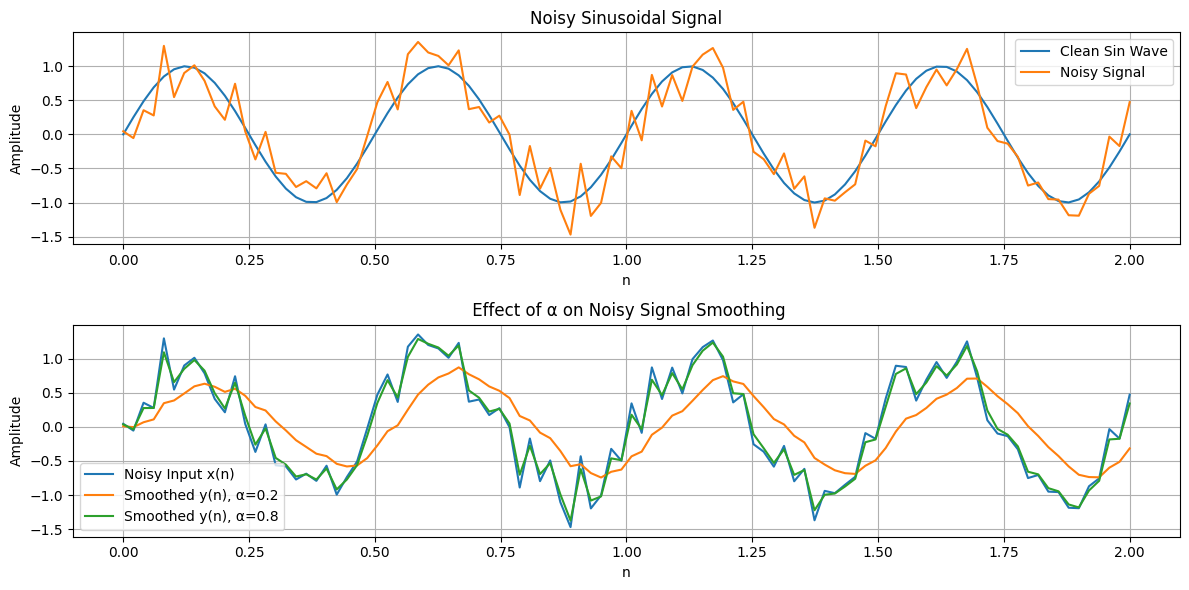

In [ ]:

# ---------------------------
# Q2: Sinusoid + Random Noise
# ---------------------------
f = 2
n = np.linspace(0, 2, 100)  # 1000 samples from 0 to 10
N = len(n)
x_clean = np.sin(2 * np.pi * f * n)
noise = noise = np.random.uniform(-0.5, .5, size=N)
# Add noise to the clean sinusoidal signal
x_noisy = x_clean + noise

y_clean_alpha1 = difference_eq(x_noisy, alpha1)
y_clean_alpha2 = difference_eq(x_noisy, alpha2)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(n, x_clean,  label='Clean Sin Wave')
plt.plot(n, x_noisy,  label='Noisy Signal')
plt.title('Noisy Sinusoidal Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(n, x_noisy,  label='Noisy Input x(n)')
plt.plot(n, y_clean_alpha1,  label='Smoothed y(n), α=0.2')
plt.plot(n, y_clean_alpha2, label='Smoothed y(n), α=0.8')
plt.title(' Effect of α on Noisy Signal Smoothing')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()